# **Scikit Imaging For Image Blur And Restoration** 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.ndimage as ndi

import plotly
import plotly.express as px
from skimage import (
    color, data, measure)

## **Converting To Grayscale** 

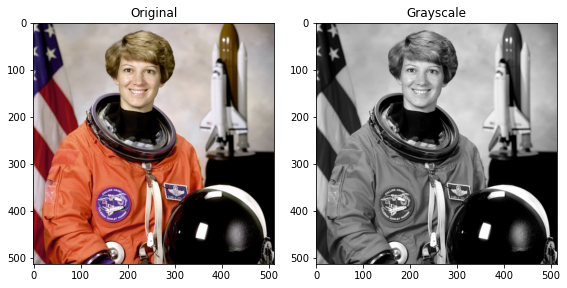

In [2]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2gray

original = data.astronaut()
grayscale = rgb2gray(original)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].imshow(original)
ax[0].set_title("Original")
ax[1].imshow(grayscale, cmap=plt.cm.gray)
ax[1].set_title("Grayscale")

fig.tight_layout()
plt.show()

# **Generating A Series Of Increasingly Blur Images** 
In this section, we will load an already available image through scikit-image's data registry. This blur metric can only be applied to single-channel images

In [3]:
image = data.astronaut()
image = color.rgb2gray(image)

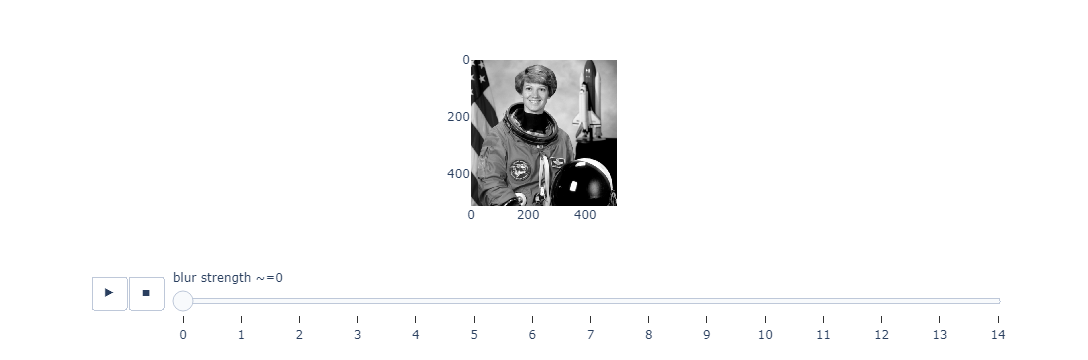

In [4]:
blurred_images = [ndi.uniform_filter(image, size=k) for k in range(2, 32, 2)]
img_stack = np.stack(blurred_images)

fig = px.imshow(
    img_stack,
    animation_frame=0,
    binary_string=True,
    labels={'animation_frame': 'blur strength ~'})
plotly.io.show(fig)

# **Plotting Graph For Image Blur** 
In this segment, we will compute the blur metric for all blurred images. We can expect the blur metric to approach 1 as the blur strength increases. The 3 values of re-blurring filter used here are: 3(strongest used here), 11(default) and 30(lowest here)

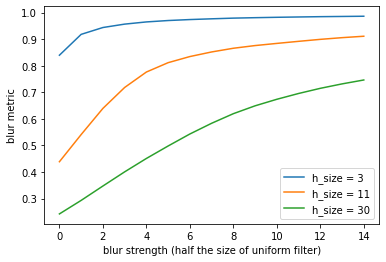

In [5]:
B = pd.DataFrame(
    data=np.zeros((len(blurred_images), 3)),
    columns=['h_size = 3', 'h_size = 11', 'h_size = 30']
)
for ind, im in enumerate(blurred_images):
    B.loc[ind, 'h_size = 3'] = measure.blur_effect(im, h_size=3)
    B.loc[ind, 'h_size = 11'] = measure.blur_effect(im, h_size=11)
    B.loc[ind, 'h_size = 30'] = measure.blur_effect(im, h_size=30)

B.plot().set(xlabel='blur strength (half the size of uniform filter)',
             ylabel='blur metric');

plt.show()

# **Python For Image Restoration**
Through deconvolution, we are able to reduce nose within an image using unsupervised wiener

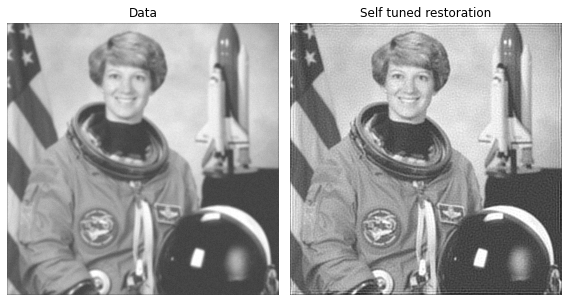

In [14]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

rng = np.random.default_rng()

astro = color.rgb2gray(data.astronaut())
from scipy.signal import convolve2d as conv2
psf = np.ones((5, 5)) / 25
astro = conv2(astro, psf, 'same')
astro += 0.1 * astro.std() * rng.standard_normal(astro.shape)

deconvolved, _ = restoration.unsupervised_wiener(astro, psf)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5),
                       sharex=True, sharey=True)

plt.gray()

ax[0].imshow(astro, vmin=deconvolved.min(), vmax=deconvolved.max())
ax[0].axis('off')
ax[0].set_title('Data')

ax[1].imshow(deconvolved)
ax[1].axis('off')
ax[1].set_title('Self tuned restoration')

fig.tight_layout()

plt.show()